In [1]:
# Importing Dependencies
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

# **EDA Analysis**
## Ticket 1.1: Continued
### Data Ingestion


In [2]:
# Load the data
job_postings = pd.read_csv('../../../../data/job_postings.csv')

display("Job Postings Dataset:")
display(job_postings.head())

'Job Postings Dataset:'

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite
3,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite


### Industry Spread and Keyword Analysis


In [3]:
# Broad Industry Keywords in Regex
industry_keywords = {
    "healthcare": r"(?i)(Bio|Medical|Pharma|Clinical|Hospital|Health|Nursing|Biotech|Wellness)\w*[-\s]?",                       # using (?i) to make capitalization insensitive
    "finance": r"(?i)(Quant|Trading|Risk|Bank|Invest|Wealth|Asset|Markets|Capital)\w*[-\s]?",                                   # using \w* to allow for any additional words or characters
    "business": r"(?i)(Business|Consulting|Strategy|BI|Analytics|Management|Operations|Process)\w*[-\s]?",                      # using [-\s] to allow for any additional words or characters
    "marketing": r"(?i)(Market|Advert|Customer|Brand|AdTech|E-?Comm|Commerce)\w*[-\s]?",
    "supply_chain": r"(?i)(Logist|Supply|Procure|Fleet|Transport|Demand|Forecast|Predict)\w*[-\s]?",
    "energy": r"(?i)(Energy|Oil|Gas|Power|Electric|Sustain|Climate|Carbon)\w*[-\s]?",
    "government": r"(?i)(Govern|Policy|Regulat|Law|Legis|Civic)\w*[-\s]?",
    "security": r"(?i)(Cyber|Threat|Risk Assess|Anomaly Detect)\w*[-\s]?",
    "tech": r"(?i)(AI|ML|Data|Cloud|Software|IT|Engineering|MLOps|Deep Learn|Computer Vision|Text|Speech Recogn)\w*[-\s]?",
    "research": r"(?i)(Academic|University|Education|Postdoc|Research)\w*[-\s]?"
}

In [4]:
# Function to Classify Job Postings by Industry
def classify_industry(job_title):
    for industry, keyword in industry_keywords.items():
        match = re.search(keyword, str(job_title))
        if match:
            keyword = re.sub(r'[^a-zA-Z]', '', match.group()).lower()
            return industry, keyword              # using match.group() to return the actual keyword that was matched rather than the regex pattern
    return "unclassified", "unclassified"


In [5]:
# apply the function to a new table created from the job_postings dataset
job_classifications = job_postings.copy()
job_classifications['industry'], job_classifications['keyword'] = zip(*job_classifications['job_title'].apply(classify_industry))

# display the first few rows of the new table
job_classifications.head()


,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,industry,keyword
0,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,unclassified,unclassified
1,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite,tech,software
2,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite,tech,data
3,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite,tech,data
4,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite,tech,data


,count
industry,
business,1575
healthcare,847
unclassified,425
marketing,235
finance,230
government,112
energy,100
supply_chain,94
research,34


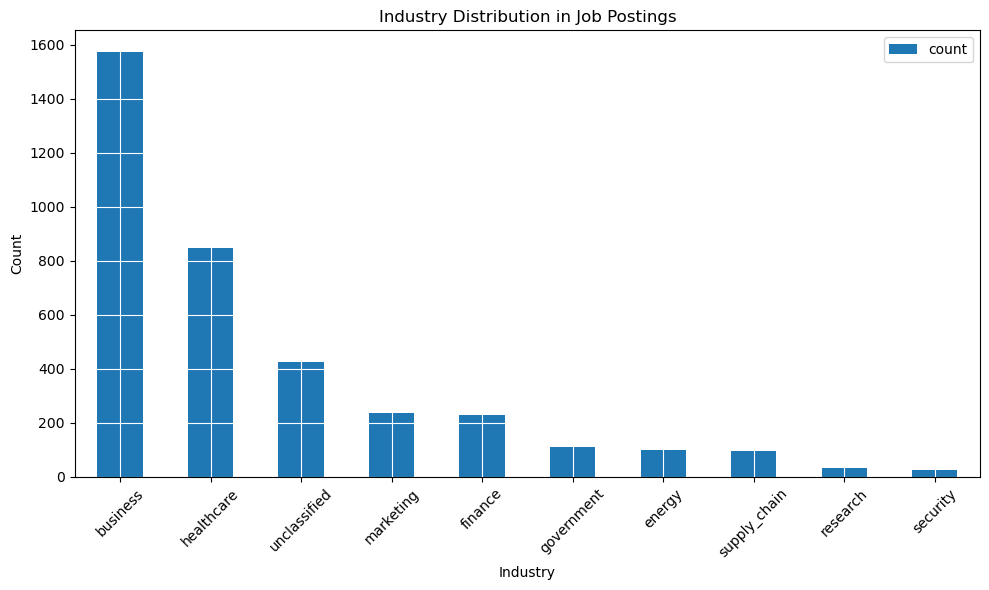

In [6]:
# count the number of each industry occurrence
industry_counts = pd.DataFrame(job_classifications['industry'].value_counts()).reset_index().set_index('industry')

# remove tech temporarily from the industry counts for readability as it skews results due to being a Data Science Focused Dataset
industry_counts = industry_counts[industry_counts.index != 'tech']

# display the counts
display(industry_counts)

# create a bar chart of the industry counts
industry_counts.plot(kind='bar', figsize=(10, 6))

# add labels and title
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Industry Distribution in Job Postings')
plt.xticks(rotation=45)
plt.grid(True, color='white')

# show the plot
plt.tight_layout()
plt.show()



### **Reflection: Industry Categorization and Data Composition**  

With the majority of job titles successfully categorized and only **425 remaining unclassified**, the **keyword-based regex system proved to be highly effective** in grouping jobs by industry/ keywords. Additonally, given that the dataset was completely **data science-focused**, it's expected that many job postings fall within **Tech**, and subsequently the business, healthcare, and marketing sectors, where data-driven decision-making is heavily integrated.  

Looking at the industry-level distribution, there is **a clear skew towards generalist and tech-adjacent industries**, which aligns with the growing demand for data science applications across fields. However, **lower representation in niche industries like research and security** suggests that **granular discipline-based classifications** may not yield enough data for meaningful insights unless supplemented with external sources.  

A key consideration is **whether industry-level grouping provides enough depth or if a more specific discipline-based categorization (e.g., "Machine Learning Engineer" vs. "Data Analyst") would be viable**. While there is a strong presence of job postings at the industry level, the **next step would be evaluating whether discipline-level segmentation (based on subfields of data science) maintains a large enough sample size** to support meaningful analysis.  


In [7]:
# count the number of each keyword occurrences
keyword_counts = pd.DataFrame(job_classifications['keyword'].value_counts()).reset_index().set_index('keyword')

# display the counts
display(keyword_counts)

,count
keyword,
data,6072
database,626
medical,488
unclassified,425
analytics,358
...,...
databrick,1
datacoves,1
lawyer,1


### **Reflection: Refining Job Title and Skill Standardization**  

As we further analyze and explore the dataset to gauge our possibilities in the realm of **job title standardization** and its **relationship to skill mapping**, the scale of variation across industries and roles has become even more apparent. Initially, I assumed that **industry-based standardization**—namely, the idea to map skills to standardized job roles based on their respective industries—would be the most logical approach. My thought process was that this would prevent the **cross-contamination** of industry-specific skills and thus allow for a more accurate mapping of skills to specific job roles. However, the data shows that at the current data size, this method risks **fragmenting the dataset too much**, leaving niche roles with **too few data points to create meaningful insights**.  

Another idea which I heavily considered was a **dual-level mapping approach**, which would categorize skills at two levels:  
1. **Industry-based categorization** → Capturing specialized knowledge unique to each industry and job title.  
2. **Technical role categorization** → Grouping jobs by broader technical roles/titles (e.g., *AI Engineer*, *Data Analyst*) to **increase sample sizes** across industries and relate technical skills to certain data science roles.  

While this would strengthen the dataset’s usability, it would also **risk the grouping of unrelated or industry-specific skills together**, particularly in highly specialized fields. This would require classifying skills into **technical, soft, and industry-specific tiers** and then subsequently applying different processes to each skill based on its classification. However, implementing this system **may exceed the available time constraints** for this project.  

### **Keyword Frequency Analysis in Job Titles and Potential Adjustments**  

As I examined the **keyword occurrences within job titles**, terms like **"data" (6072 occurrences), "database" (626), "analytics" (358), "AI" (146), and "cloud" (87)** showed a strong presence, which was expected given the dataset’s focus on data-related roles. However, there is also a significant number of **niche or domain-specific terms** such as **"biostatistics" (10), "cybersecurity" (13), and "biopharma" (3)** that appear much less frequently.  This lack of representation in job titles could pose challenges in the **analysis and visualization stages**, as job titles with fewer than **5–10 occurrences** may not provide meaningful insights. At such low frequencies, **ranking skill importance or even establishing relevant skill relationships** becomes difficult, potentially leading to inactionable or misleading data.

This raises the question of **how to refine our job title standardization process** without over-generalizing or losing valuable distinctions. Some potential strategies include:  
- **Filtering out single-occurrence job titles** to remove excessive noise and outliers.  
- **Using interquartile range (IQR) or percentile-based cutoffs** to determine a threshold for low-frequency job titles.  
- **Grouping keywords dynamically** to align with how job titles naturally cluster—whether by technical skills, industry, or specialization.  

At this stage, I am still considering the best approach, but these initial findings highlight the need to **balance granularity with standardization** in job title classification.  

### **Current Consideration: Focusing on Technical Titles in Data Science**  

Given the continued **EDA** findings, one practical refinement could be **limiting the project’s scope to technical job titles** such as *Data Analyst*, *Data Engineer*, *Data Scientist*, *Machine Learning Engineer*, *Full-Stack Developer*, etc. This would simplify standardization by removing **industry-dependent or specific job roles** while ensuring the tool provides **actionable insights on technical data science skills demand**.  

By narrowing the scope in this way, we can **ensure a more structured and scalable approach to job title standardization** while avoiding excessive fragmentation. The next steps will involve **evaluating different filtering and keyword grouping methods** to determine the most effective way to process job title standardization while maintaining **meaningful role differentiation**.